In [ ]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#cd /content/drive/MyDrive/islab

/content/drive/MyDrive/islab


In [ ]:
#day2

x = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))


[ 1.09605324e+04 -4.19226213e+04  6.61897420e+04 -5.58680094e+04
  2.71801061e+04 -7.57524021e+03  1.11247931e+03 -8.57100100e+01
  9.25775863e+00 -3.37558558e-02]
[ 1.09523755e+04 -4.18897294e+04  6.61344758e+04 -5.58177503e+04
  2.71532272e+04 -7.56664339e+03  1.11088058e+03 -8.55498663e+01
  9.25015776e+00 -3.36166092e-02]


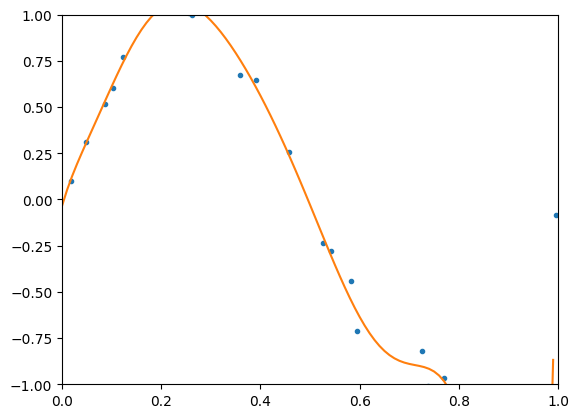

In [ ]:
#use leastSquares
def leastSquares(X, Y, degree):      
    Xs = []
    for i in range(degree+1):
        Xs.append(X**i)
    Xs = np.array(Xs).T
    Y = Y.T
    XT = Xs.transpose()
    W = np.dot(np.dot(np.linalg.inv(np.dot(XT,Xs)),XT),Y)
    return W[::-1]

x = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))

print(leastSquares(x, y, 9))

#use polyfit
f = np.polyfit(x, y, 9) 
p = np.poly1d(f)
print(f)
x_pred = np.arange(0.0, 1.0, 0.01)
y_pred = p(x_pred)

plt.axis([0,1,-1,1])
plt.plot(x, y, '.')
plt.plot(x_pred, y_pred)
plt.show()

Fitting Parameters: [ 1.09445232e+04 -4.18579475e+04  6.60808448e+04 -5.57687369e+04
  2.71268657e+04 -7.55815748e+03  1.10929128e+03 -8.53901110e+01
  9.24293818e+00 -3.35236737e-02]


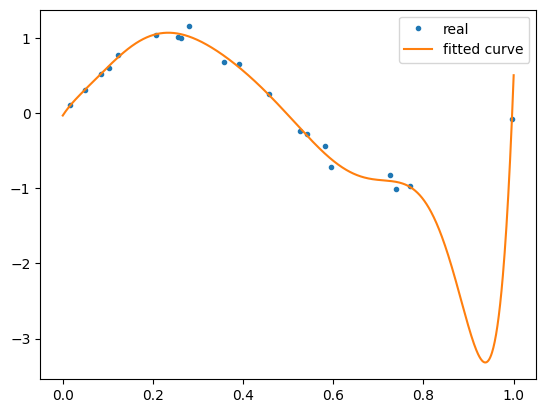

In [ ]:
#use leastSq
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

def fitting(M=0):
    
    p_init = np.random.rand(M+1)
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    plt.plot(x, y, '.', label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.legend()
    return p_lsq

x_points = np.linspace(0, 1, 1000)
p_lsq_0 = fitting(M=9)


In [ ]:
#day3 7.11

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred = p(x)
rmse_pred = rmse(y_pred, y)
print("rms error is: " + str(rmse_pred))

rms error is: 0.05959804144220472


In [ ]:
#day3 7.12

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

f = np.polyfit(x_train, y_train, 3)
p = np.poly1d(f)

In [ ]:
#day3 7.13

y_train_pred = p(x_train)
rmse_train = rmse(y_train_pred, y_train)
print("rms error is: " + str(rmse_train))

rms error is: 0.08541622911643237


In [ ]:
#day3 7.14

y_test_pred = p(x_test)
rmse_test = rmse(y_test_pred, y_test)
print("rms error is: " + str(rmse_test))

rms error is: 0.11403857337933553


[0.5232325604106962, 0.5218221649020054, 0.08541622911643237, 0.08002486944244404, 0.014998197197166163, 0.011764712755439711, 0.002294870738029005, 0.0016442925232588138, 1.6107886113558946e-10] [0.4810307651549484, 0.4853047790088638, 0.11403857337933553, 0.13542681770675433, 0.13066365526770835, 0.16668281226839998, 0.4875207556272667, 0.5660569289022956, 5.807469136586921]
<class 'list'>


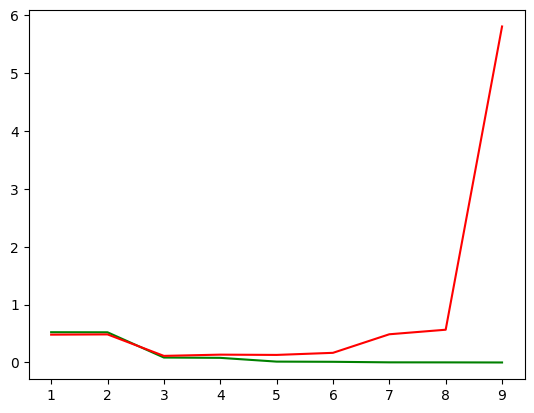

In [ ]:
#day3 7.15

M = [1,2,3,4,5,6,7,8,9]
RMSE_train = []
RMSE_test = []

for num in M:
    f = np.polyfit(x_train, y_train, num) 
    p = np.poly1d(f)
    y_train_pred = p(x_train)
    rmse_train = rmse(y_train_pred, y_train)
    RMSE_train.append(rmse_train)
    y_test_pred = p(x_test)
    rmse_test = rmse(y_test_pred, y_test)
    RMSE_test.append(rmse_test)

print (RMSE_train, RMSE_test)
print (type(RMSE_train))
plt.plot(M, RMSE_train, color='green', label='training error')
plt.plot(M, RMSE_test, color='red', label='testing error')

#day3 7.16 略